In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('./datasets/Linear_X_Train-Copy1.csv')
df1.head(5)

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [3]:
df2 = pd.read_csv('./datasets/Linear_Y_Train-Copy1.csv')
df2.head(5)

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


In [4]:
x , y = df1.to_numpy() , np.array(df2)
print(x.shape , y.shape)

(3750, 1) (3750, 1)


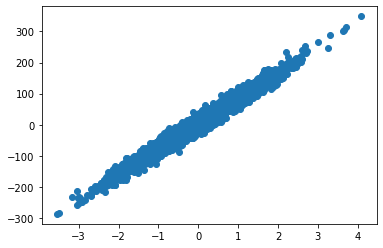

In [5]:
plt.scatter(x , y);

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [9]:
class LinearRegression(nn.Module):
    def __init__(self , in_features):
        super().__init__()
        
        self.linear = nn.Linear(in_features , 1)
        
    def forward(self , x):
        return self.linear(x)
    

model = LinearRegression(1)

In [10]:
for name , param in model.named_parameters():
    print(name , ':' , param , param.shape)

linear.weight : Parameter containing:
tensor([[-0.8257]], requires_grad=True) torch.Size([1, 1])
linear.bias : Parameter containing:
tensor([-0.0888], requires_grad=True) torch.Size([1])


In [11]:
X , Y = torch.FloatTensor(x) , torch.FloatTensor(y)
print(X.dtype , Y.dtype)

torch.float32 torch.float32


In [12]:
epochs = 2000
optimizer = optim.Adam(model.parameters() , lr = 0.1)  # parameters to be updated – the weight and the bias.
criterion = nn.MSELoss()

loss.backward() computes _dloss/dx_ for every parameter x which has _requires_grad=True_. These are accumulated into _x.grad_ for every parameter x. In pseudo-code:

_x.grad += dloss/dx_

optimizer.step updates the value of x using the gradient x.grad. For example, the SGD optimizer performs:

_x += -lr * x.grad_

_optimizer.zero_grad()_ clears _x.grad_ for every parameter x in the optimizer. It’s important to call this before _loss.backward()_, otherwise you’ll accumulate the gradients from multiple passes.

In [19]:
assert model(X).shape == (x.shape[0] , 1)

In [20]:
losses = []
for i in range(epochs+1):
    y_pred = model(X)              # forward pass
    loss = criterion(y_pred , Y)   # calculate mse loss
    losses.append(loss.item())     # return tensor as python number
    
    if(i%400 == 0):
        print(f"Epoch: {i} Loss: {loss.item()}")
    
    optimizer.zero_grad()   # calculated gradient is equal to 0 after each epoch
    loss.backward()         # calculates gradient wrt each parameter
    optimizer.step()        # backpropagation - update parameters   

Epoch: 0 Loss: 6708.0078125
Epoch: 400 Loss: 2281.91064453125
Epoch: 800 Loss: 655.31005859375
Epoch: 1200 Loss: 253.12246704101562
Epoch: 1600 Loss: 195.3175048828125
Epoch: 2000 Loss: 191.09518432617188


In [21]:
y_pred = model(X)

In [24]:
X.requires_grad

False

In [26]:
y_pred.requires_grad

True

tensor.detach() creates a tensor that shares storage with tensor that does not require grad. You should use detach() when attempting to remove a tensor from a computation graph. In order to enable automatic differentiation, PyTorch keeps track of all operations involving tensors for which the gradient may need to be computed (i.e., require_grad is True). The operations are recorded as a directed graph.

The detach() method constructs a new view on a tensor which is declared not to need gradients, i.e., it is to be excluded from further tracking of operations, and therefore the sub-graph involving this view is not recorded.

This is expected behavior because moving to numpy will break the graph and so no gradient will be computed.

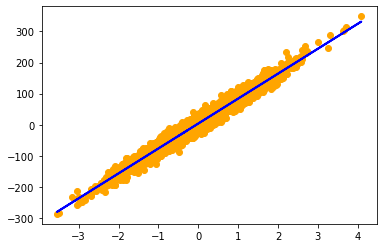

In [33]:
plt.scatter(x , y , color = 'orange')
plt.plot(X , y_pred.detach() , color = 'blue' , linewidth = 2); 

# Returns a new Tensor, detached from the current graph which does not require gradient
# y_pred is a value for which gradient is calculated and so we cannot convert it into numpy tensor directly

In [36]:
for i in model.parameters():
    print(i)

Parameter containing:
tensor([[80.1688]], requires_grad=True)
Parameter containing:
tensor([3.7138], requires_grad=True)


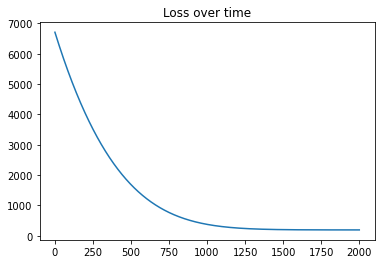

In [40]:
plt.plot(np.arange(epochs+1) , losses)
plt.title("Loss over time");

## Method-2

In [71]:
# A kind of Tensor that is to be considered a module parameter
# m and c are parameters for which gradient has to be calculated and optimized

m = nn.Parameter(data = torch.randn(1) , requires_grad=True)     # initialize with random value
c = nn.Parameter(data = torch.randn(1) , requires_grad=True)

In [72]:
print(m , c)

Parameter containing:
tensor([1.7239], requires_grad=True) Parameter containing:
tensor([-0.6837], requires_grad=True)


In [73]:
y_hat = X*m + c
print(y_hat.requires_grad)

True


In [74]:
def mse_loss(y_pred , y_true):
    return ((y_pred - y_true)**2).mean()

In [75]:
lr = 0.1
epochs = 200
losses = []
weight1 = []
weight2 = []

for i in range(epochs+1):
    y_hat = X*m + c   
    loss = mse_loss(y_hat , Y)
    losses.append(loss.item())
    if i%50==0:
        print(loss.item())
        
    loss.backward()              # computes gradient which gets accumulated in m.grad and c.grad
    
    # If you use this no_grad(), you can control the new m and new c have no gradients since they are generated by operations, 
    # which means you only change the value of m and c, not gradient part, 
    # they still have previous defined variable gradient information and back propagation can continue
    
    with torch.no_grad():     # disable gradient calculation locally
        m -= lr*m.grad
        c -= lr*c.grad
        
        weight1.append(m.detach().item())
        weight2.append(c.detach().item())
        
        m.grad.zero_()
        c.grad.zero_()

6307.54150390625
190.95559692382812
190.95558166503906
190.95558166503906
190.95558166503906


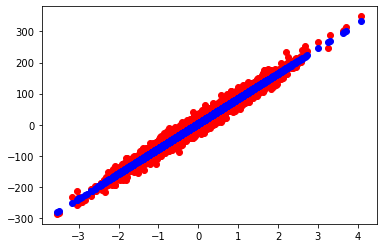

In [86]:
plt.scatter(X.numpy() , Y.numpy() , c = 'r')    
plt.scatter(X.numpy() , y_hat.detach().numpy() , c = 'b');